# 3.LIGHT

## 3.3.Specular Reflection

Modeling Specular Reflection (모형화 정반사)
실제 값과 다른 모형을 계속 모델링을 하고있다.
하지만 이번 장의 모형화 정반사를 이용하여 조금은 인위적이지만 자연스러운 lighting 처리를 해보도록한다.

모형화 정반사의 핵심에서는 
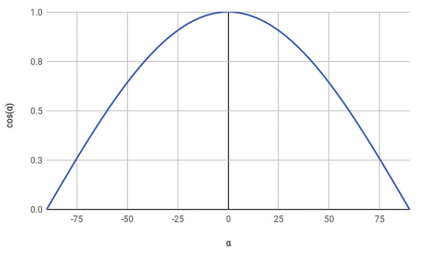
위 그래프가 있다.

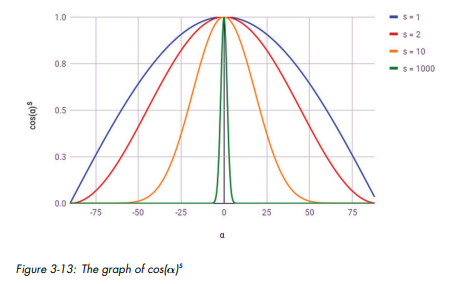

s 값이 정점지수로 표면의 특성

S는 정점지수라고 하며 표면의 특성이다. (빛 반사의 정도)
이때 s는 실제 값 혹은 물리적 모델에 기초하지 않아 s값을 조정하여 값을 찾아내는 과정을 거쳐야한다. 양방향 반사함수(BDRF)는 물리 기반 모델임

++ BDRF:
대상 BRDF 분포를 측정하거나 합성

이 분포를 샘플링하여 이를 다시 분리하고 제작이 가능하도록 한다.

이 분포를 생성하는 형상을 디자인한다. (마이크로페이스트, 하프토닝).

제조 절차에 관계없이 표면의 연속성과 부드러움을 최적화한다.
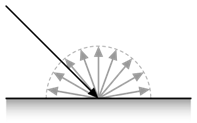 $$퍼지는$$ 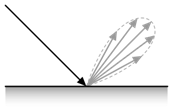 $$광택$$ 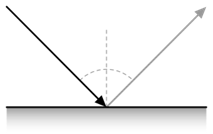 $$거울$$

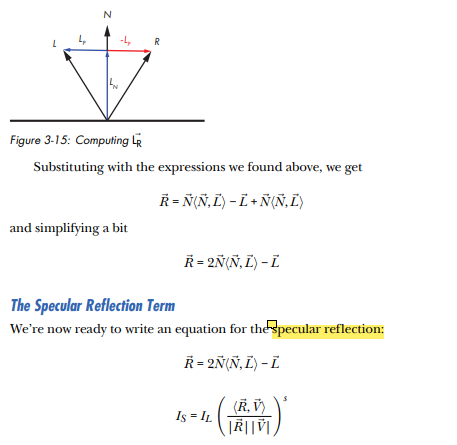

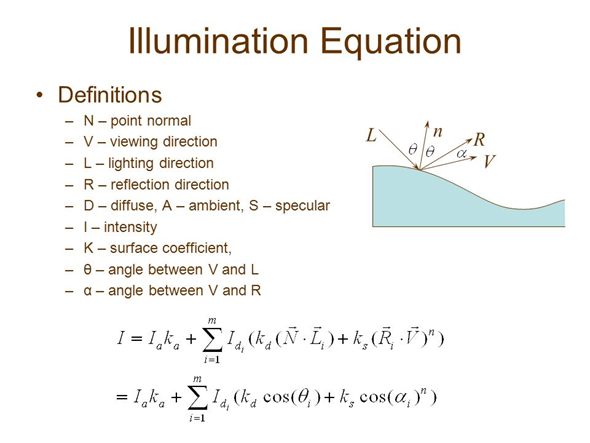
$$조도 방정식$$

In [ ]:
sphere {
    center = (0, -1, 3)
    radius = 1
    color = (255, 0, 0) # Red
    specular = 500 # Shiny
}
sphere {
    center = (2, 0, 4)
    radius = 1
    color = (0, 0, 255) # Blue
    specular = 500 # Shiny
}
sphere {
    center = (-2, 0, 4)
    radius = 1
    color = (0, 255, 0) # Green
    specular = 10 # Somewhat shiny
}
sphere {
    center = (0, -5001, 0)
    radius = 5000
    color = (255, 255, 0) # Yellow
    specular = 1000 # Very shiny
}

In [ ]:
sphere1 = Sphere([0, -1, 3], 1, [0, 255, 0], 500)
sphere2 = Sphere([2, 0, 4], 1, [255, 0, 0], 500)
sphere3 = Sphere([-2, 0, 4], 1, [0, 0, 255], 10)
sphere4 = Sphere([0, -5001, 0], 5000, [255, 255, 0], 1000)

spheres = [sphere1, sphere2, sphere3, sphere]

In [ ]:
ComputeLighting(P, N, V, s) {
    i = 0.0
    for light in scene.Lights {
        if light.type == ambient {
            i += light.intensity
        } else {
            if light.type == point {
                L = light.position - P
            } else {
                L = light.direction
            }
    // Diffuse
            n_dot_l = dot(N, L)
            if n_dot_l > 0 {
                i += light.intensity * n_dot_l/(np.linalg.norm(N) * np.linalg.norm(L))
            }
    // Specular
            if s != -1 {
                R = 2 * N * dot(N, L) - L
                r_dot_v = dot(R, V)
                if r_dot_v > 0 {
                    i += light.intensity * pow(r_dot_v/(np.linalg.norm(R) * np.linalg.norm(V)), s)
                }
            }
        }
    }
    return i
}


In [21]:
def ComputeLighting(point, normal, view, specular):
    intensity = 0
    length_n = np.linalg.norm(normal)
    length_v = np.linalg.norm(view)
    for i in range (len(lights)) :
        light = lights[i]
    
        if light.ltype == AMBIENT:
            intensity += light.intensity
        else :
            vec_l = []
            if light.ltype == POINT:
                vec_l = np.subtract(light.position, point)
            else :  #DIRECTIONAL
                vec_l = light.position

      # Diffuse reflection.
            n_dot_l = np.dot(normal, vec_l)
            if( n_dot_l > 0) :
                intensity += light.intensity * n_dot_l / (length_n * np.linalg.norm(vec_l))
      

      # Specular reflection.
            if (specular != -1 ):
                vec_r = np.subtract(np.multiply(2.0*np.dot(normal, vec_l), normal), vec_l)
                r_dot_v = np.dot(vec_r, view)
                if (r_dot_v > 0):
                    intensity += light.intensity * math.pow(r_dot_v / (np.linalg.norm(vec_r) * length_v), specular)
    return intensity;


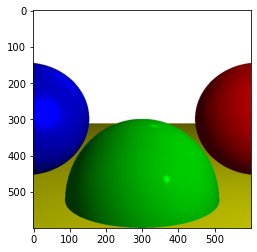

In [57]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

canvas_width = 600
canvas_height = 600


####################################

class Light:
    def __init__(self, ltype, intensity, position):
        self.ltype = ltype
        self.intensity = intensity
        self.position = position
class Sphere:
    def __init__(self, center, radius, color, specular):
        self.center = center
        self.radius = radius
        self.color = color
        self.specular = specular

AMBIENT = 0
POINT = 1
DIRECTIONAL = 2
 
        
viewport_size = 1
projection_plane_z = 1
camera_position = [0,0,0]
background_color = [255,255,255]


light1 = Light(AMBIENT, 0.2, None)
light2 = Light(POINT, 0.6, [2,1,0])
light3 = Light(DIRECTIONAL, 0.2, [1,4,4])
lights = [light1, light2, light3]




sphere1 = Sphere([0, -1, 3], 1, [0, 255, 0], 500)
sphere2 = Sphere([2, 0, 4], 1, [255, 0, 0], 500)
sphere3 = Sphere([-2, 0, 4], 1, [0, 0, 255], 10)
sphere4 = Sphere([0, -5001, 0], 5000, [255, 255, 0], 1000)
spheres = [sphere1, sphere2, sphere3, sphere4]

        

def canvas2viewport(point2d):
    return [point2d[0] * viewport_size / canvas_width, point2d[1] * viewport_size / canvas_height, projection_plane_z]

def intersect_ray_sphere(origin, direction, sphere):
    oc = np.subtract(origin, sphere.center)
    
    k1 = np.dot(direction, direction)
    k2 = 2*np.dot(oc, direction)
    k3 = np.dot(oc, oc) - sphere.radius*sphere.radius
    
    discriminant = k2*k2 - 4*k1*k3
    if (discriminant < 0):
        return [math.inf, math.inf]
    
    t1 = (-k2 + math.sqrt(discriminant)) / (2*k1)
    t2 = (-k2 - math.sqrt(discriminant)) / (2*k1)
    return [t1, t2]


def traceray(origin, direction, min_t, max_t):
    closest_t = math.inf
    closest_sphere = None
    
    for i in range(len(spheres)):
        ts = intersect_ray_sphere(origin, direction, spheres[i])
        if ts[0] < closest_t and min_t < ts[0] and ts[0] < max_t:
            closest_t = ts[0]
            closest_sphere = spheres[i]
        if ts[1] < closest_t and min_t < ts[1] and ts[1] < max_t:
            closest_t = ts[1]
            closest_sphere = spheres[i]
            
    if closest_sphere == None:
        return background_color
    
    point = np.add(origin, np.multiply(closest_t, direction))
    normal = np.subtract(point, closest_sphere.center)
    normal = np.multiply(1.0 / np.linalg.norm(normal), normal)
    view = np.multiply(-1, direction)
    
    return np.multiply(ComputeLighting(point, normal, view, closest_sphere.specular), closest_sphere.color)
    

def putpixel(x, y, color):
    x = canvas_width/2 + x
    y = canvas_height/2 - y -1
    if (x< 0 or x >= canvas_width or y < 0 or y >= canvas_height):
        return 
    cv2.line(img, (int(x), int(y)), (int(x), int(y)), (color[0], color[1], color[2]))
    
    
x = -canvas_width/2
y = -canvas_height/2
    
img = np.zeros((canvas_width,canvas_height,3), dtype = np.uint8)


def ComputeLighting(point, normal, view, specular):
    intensity = 0
    length_n = np.linalg.norm(normal)
    length_v = np.linalg.norm(view)
    for i in range (len(lights)) :
        light = lights[i]
    
        if light.ltype == AMBIENT:
            intensity += light.intensity
        else :
            vec_l = []
            if light.ltype == POINT:
                vec_l = np.subtract(light.position, point)
            else :  #DIRECTIONAL
                vec_l = light.position

      # Diffuse reflection.
            n_dot_l = np.dot(normal, vec_l)
            if( n_dot_l > 0) :
                intensity += light.intensity * n_dot_l / (length_n * np.linalg.norm(vec_l))
      

      # Specular reflection.
            if (specular != -1 ):
                vec_r = np.subtract(np.multiply(2.0*np.dot(normal, vec_l), normal), vec_l)
                r_dot_v = np.dot(vec_r, view)
                if (r_dot_v > 0):
                    intensity += light.intensity * math.pow(r_dot_v / (np.linalg.norm(vec_r) * length_v), specular)
    return intensity;



for i in range(canvas_width):
    for j in range(canvas_height):
        direction = canvas2viewport([x,y])
        color = traceray(camera_position, direction, 1, math.inf)
        putpixel(x,y,color)
        y+=1
    y = -canvas_height/2
    x+=1
 
plt.imshow(img)

#cv2.imshow('Raytracer', img)
#cv2.waitKey()
#cv2.destoryAllWindows()